# Pricing Interst Rate Options

# 1. Short Rate Models

We will relax the assumption of contant risk-free continuously compounded interest rates and will model our interest rates using **stochastic differential equations**

**Short Rate Models** explain the instantaneous continuously-compounded interest rate at time t, $r_t$

**Meaning:**

- An investment will grow approx. over a **very short period t**.

$$Xe^{r_{t \Delta t}}$$


- Over a period from $[0, t]$ it will grow:

$$Xe^{\int_0^t r_s ds}$$


- The Present Value of an asset will be equal to:

$$Xe^{-\int_0^t r_s ds}$$

## Vasicek Model

The Vasicek model specifies a stochastic differential equation for the short rate $r_t$ as:

$$ dr_t = \alpha(b-r_t)dt + \sigma dW_t, r_0=r(0) $$

Where, $r(0)$ is the short rate at time 0 and $\alpha, b, \sigma$ are positive constants.


- $b$ is the level to whcih the short rate will tend in the long run (mean-level)


- $\alpha$ is the rate at which the short rate will tend towards b 


- $\sigma$ is the volatility of the short rate

The solution to the SDE is: 

$$ r_t = r(0)e^{-\alpha t} + b(1-e^{- \alpha t}) + \sigma e^{- \alpha t} \int_0^t e^{\alpha s } dW_s $$

This means that $r_t$ is **normally distributed**:

$$ r_t \sim N(r(0)e^{-\alpha t} + b(1-e^{- \alpha t}), \frac{\sigma^2}{2 \alpha}(1 - e^{- 2\alpha t})) $$

- **Mean:** $r(0)e^{-\alpha t} + b(1-e^{- \alpha t})$


- **Variance:** $\frac{\sigma^2}{2 \alpha}(1 - e^{- 2\alpha t})$

**N.B.** as $t \rightarrow \infty$


- $mean(r_t) \rightarrow b$


- $var(r_t) \rightarrow \frac{\sigma^2}{2 \alpha}$

### Modelling a Path for the Short Rate

if we know the value of $r_{t_1}$ and $t_2 > t_1, r_{t_2}$ is normally distributed with:

- Mean: $r_{t_1}e^{- \alpha(t_2 - t_1)} + b(1-e^{- \alpha(t_2 - t_1)})$



- Variance: $\frac{\sigma^2}{2 \alpha}(1 - e^{- \alpha(t_2 - t_1)})$

We can treadt $t_1$ as a new starting point for our modelling, given the independence of increments of Brownian Motion

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [2]:
# parameters

r0 = 0.05
alpha = 0.2
b = 0.08
sigma = 0.025

In [3]:
def vasi_mean(r, t1, t2):
    """
    Gives the mean under the Vasicek Model. Note that t2 > t1. r is the
    interest rate from the beginning of the period.
    """
    return np.exp(-alpha*(t2-t1))*r+b*(1-np.exp(-alpha*(t2-t1)))

def vasi_var(t1,t2):
    """
    Returns the variance under the Vasicek model with t2>t1
    """
    return (sigma**2)*(1-np.exp(-2*alpha*(t2-t1)))/(2*alpha)

##### Simulating Interest Rate Paths (on an annual basis)

We create 10 simulations of possible short term interest rate paths over a period of 10 years. If done on a monthly basis can make the array t include fractional values.

The simulated short rates, in terms of paths are of the form:

$$ r_{i+1} = r_i e^{- \alpha(t_{i+1} - t_i)} + b(1 - e^{\alpha (t_{i+1} - t_i)}) + \sqrt{\frac{\sigma^2}{2 \alpha}(1 - e^{-2 \alpha(t_{i+1} - t_i)})}Z_i $$

The `s_mean` array contains the expected value of the short rate at each point in time

In [8]:
np.random.seed(0)

n_years = 10
n_simulations = 10

t = np.array(range(0,n_years+1))

# standard nromal for each year and each simulation
Z = norm.rvs(size=[n_simulations, n_years])

# this array stores the paths
r_sim = np.zeros([n_simulations, n_years+1])

# set the first column (initial value of each simulation) to r(0)
r_sim[:,0] = r0

vasi_mean_vector = np.zeros(n_years+1)

for i in range(n_years):
    # interest rate paths
    r_sim[:, i+1] = vasi_mean(r_sim[:,i], t[i], t[i+1]) + np.sqrt(vasi_var(t[i], t[i+1]))*Z[:,i]
    
s_mean = r0*np.exp(-alpha*t) + b*(1-np.exp(-alpha*t))
    

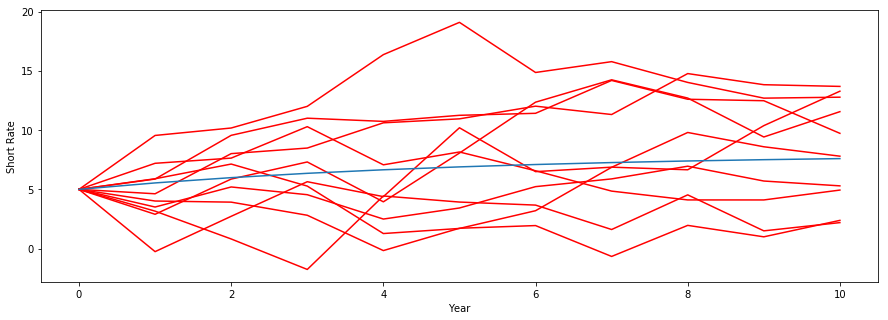

In [13]:
# Plotting the results
plt.figure(figsize=(15,5))
t_graph = np.ones(r_sim.shape)*t
plt.plot(np.transpose(t_graph), np.transpose(r_sim*100), "r")
plt.plot(t,s_mean*100)
plt.xlabel("Year")
plt.ylabel("Short Rate")
plt.show()

**N.B.** the short rate can become negative (this is an unfavorable property in many interst rate modeling problems).

## Hull-White Model

Specifies a SDE for the short rate as follows:

$$ dr_t = (\theta(t) - \alpha(t)r_t)dt + \sigma(t)dW_t. r_0 = r(0) $$

Where $\theta(t), \alpha(t), \sigma(t)$ can be time dependent.

Therefore we can see that the Vasicek Model is a **special case** of the Hull-White model where:

- $\theta(t) = \alpha b$

- $\alpha(t) = \alpha$

- $\sigma(t) = \sigma$

**Mean-Reversion Varying over Time:**

In practice, the Hull-White model is often implemented with only $\theta(t)$ being non-constant, which means that the mean reversion level is allowed to vary over time and the model can be better calibrated to prices or rates seen in the market.


## Cox-Ingersoll-Ross Model (CIR)

Also suggests an SDE for short term rates:

$$ dr_t = \alpha(b-r_t)dt + \sigma \sqrt{r_t} dW_t, r_0 = r(0) $$

- $b$ is the mean level for the short term rate



- $\alpha$ is the rate of mean reversion



- If $2ab \geq \sigma^2$ and $r(0) > 0$ then $r_t$ will **never become negative** (Feller Condition)


as $r_t \rightarrow 0$:

- The volatility of the short term rate becomes close to 0


- Then the **upward drift** to the mean will exceed the **downward movement** of the volatility


**Disadvantage:** The CIR Model does **not** have a closed-form solution, but it can be simulated directly, since its conditional distribution is known.

## Non-Constant Interest Rate Pricing

Suppose we want to price a derivative on some underlying process given by $X_t$. If the derivative has a maturity of T and a payoff function $\phi(.)$, the price of the option at time 0 is given by:

$$ P = E^Q[ e^{-\int_0^T r_t dt} \phi(X_T)] $$

Where Q is the risk-neutral measure.

**N.B.** The underlying process can be something related to interest rates, such that this formula is how one would price interest rate derivates (Interest Rate Swaps).

# 2. Applications of Short Rates

## Price of a Zero-Coupon Bond

This is equivalent to finding the average discount factor. The price of a ZCB at time $t$ with maturity $T$ is given by:

$$ B(t,T) = E[e^{-\int_t^Tr_s ds}] $$

Where the expectation is taken under the risk-neutral measure.

#### Applying the Vasicek Model to Price ZCBs

$$ dr_t = \alpha(b-r_t)dt + \sigma dW_t, r_0=r(0) $$

Under this model, the above expectation is given by:

$$ B(t,T) = e^{-A(t,T)r_t + D(t,T)} $$

Where,

$$A(t,T) = \frac{1-e^{-\alpha(T-t)}}{\alpha} $$

$$D(t,T) = (b - \frac{\sigma^2}{2 \alpha^2})[A(t,T) - (T-t)] - \frac{\sigma^2 A(t,T)^2}{4 \alpha}$$

In this way we have a closed-form solution for our bond prices in the Vasicek Model

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [15]:
# Parameters
r0 = 0.05
alpha = 0.2
b = 0.08
sigma = 0.025

In [16]:
def vasi_mean(r, t1, t2):
    """
    Gives the mean under the Vasicek Model. Note that t2 > t1. r is the
    interest rate from the beginning of the period.
    """
    return np.exp(-alpha*(t2-t1))*r+b*(1-np.exp(-alpha*(t2-t1)))

def vasi_var(t1,t2):
    """
    Returns the variance under the Vasicek model with t2>t1
    """
    return (sigma**2)*(1-np.exp(-2*alpha*(t2-t1)))/(2*alpha)

In [17]:
# Analytical Bond price
def A(t1, t2):
    return (1-np.exp(-alpha*(t2-t1)))/alpha

def D(t1, t2):
    val_1 = (t2-t1-A(t1,t2))*(sigma**2/(2*alpha**2)-b)
    val_2 = sigma**2*A(t1,t2)**2/(4*alpha)
    return val_1 - val_2

def bond_price(r,t,T):
    return np.exp(-A(t,T)*r + D(t,T))

##### Joint Simulation

In order to create estimates for our bond prices, we are going to be jointly simulating the short term rate, $r_t$ and a value $\int_0^t r_s ds$ which we will denote as $Y_t$



Since $r_t$ is Gaussian and $Y_t$ is an integral of Gaussians, they have a **Joint Gaussian Distribution**.

Therefore, we can simulate them together once we have a vale for their means, variances and correlation.

##### Gaussian Distribution of r

$$ r_t \sim N(r(0)e^{-\alpha t} + b(1-e^{- \alpha t}), \frac{\sigma^2}{2 \alpha}(1 - e^{- 2\alpha t})) $$

##### Gaussian Distribution of Y

$$ Y_{t_2} \sim N(Y_{t_1} + (t_2 - t_1)b + (r_{t_1} - b)A(t_1, t_2), \frac{\sigma^2}{\alpha^2}(t_2 - t_1 - A(t_1, t_2) - \alpha \frac{A(t_1, t_2)^2}{2}) ) $$

With $t_2 > t_1$

Covariance($Y_{t_2}, r_{t_2}$) $ = \frac{\sigma^2  A(t_1, t_2)^2}{2}$

Correlation($Y_{t_2}, r_{t_2}$) $ = \frac{\sigma^2  A(t_1, t_2)^2}{2 \sigma(r_{t_2})\sigma(Y_{t_2})}$

Where sigma(Y) is the Standard Deviation

In [27]:
# Functions for means, variance, and correlations

## calculates the mean for Yt2 given Yt1 and rt1, where t1 < t2
def Y_mean(Y, r, t1, t2):
    return Y + (t2-t1)*b+(r-b)*A(t1,t2)

## calculates the variance for Yt2
def Y_var(t1,t2):
    return sigma**2*(t2-t1-A(t1,t2)**2/2)/(alpha**2)

## covariance bewteen yt2 and rt2
def rY_var(t1, t2):
    return sigma**2*2*(A(t1,t2)**2)/2
   
## correlation from the covariance
def rY_rho(t1, t2):
    return rY_var(t1,t2)/np.sqrt(vasi_var(t1,t2)*Y_var(t1,t2))

We can therefore, simulate joint paths for $r_t$ and $Y_t$ by simulating standard normal random variales with this correlation and then transforming them into normal variables with appropriate means and variances.

If $Z_i \sim N(0,1)$ for i = 1, 2 then $Z_1$ and $\rho Z_1 + \sqrt{1- \rho ^2}Z_2$ have a correlation of $\rho$. 


This is why we transform `Z_mont2` so that `Z_mont1` and `Z_mont2` have the correlation necessary to simulate $r_t$ using `Z_mont1` and $Y_t$ using `Z_monts`


$$B(0,t) = E[e^{- \int_0^t r_s ds}] = E[e^{-Y_t}]$$

This is implemented at the end

In [31]:
# Initial Y Value
Y0 = 0

np.random.seed(0)

# number of years simulated and number of simulations
n_years = 10
n_simulations = 100000

# array of number of years
t = np.array(range(0,n_years+1))

# standard normal for the two variables
Z_mont1 = norm.rvs(size= [n_simulations, n_years])
Z_mont2 = norm.rvs(size= [n_simulations, n_years])
r_simtemp = np.zeros([n_simulations, n_years+1])
Y_simtemp = np.zeros([n_simulations, n_years+1])

# Set the first column (the initial value of each simulation) to r(0) and Y(0)
r_simtemp[:,0] = r0
Y_simtemp[:,0] = Y0

# Creating correlated standard normals
correlations = rY_rho(t[0:-1], t[1:]) # 0 to last, from t to all
Z_mont2 = correlations*Z_mont1 + np.sqrt(1-correlations**2)*Z_mont2

# run simulation
for i in range(n_years):
    # generate the rt and yt paths
    r_simtemp[:, i+1] = vasi_mean(r_simtemp[:,i], t[i], t[i+1]) + np.sqrt(vasi_var(t[i], t[i+1]))*Z_mont1[:,i]
    Y_simtemp[:, i+1] = Y_mean(Y_simtemp[:,i], r_simtemp[:,i], t[i], t[i+1]) + np.sqrt(Y_var(t[i], t[i+1]))*Z_mont2[:,i]

# Estimate bond prices using Monte Carlo by taking the mean bond prices for each year over all simulations
ZCB_prices = np.mean(np.exp(-Y_simtemp), axis=0)

### Quadrature Approach of Estimating the Values

An alternative to simulating the $Y_t$ values is to estimate them using only $r_t$ as follows:

$$ y_t = \int_0^t r_s ds \approx \Sigma_{i=0}^{n-1}r_{t_i}\delta_i \approx \sum_{i=0}^{n=1} \frac{r_{t_i} + r_{t_{i+1}}}{2}\delta_i$$

Where,

- $0 = t_0 < t_1 < t_2 < ... < t_n = t$


- $\delta_i = t_{i+1}-t_i$


This is an Example of a Quadrature, and we would expect the second approximation to be more accurate than the first this it has an O($\delta^2$) error vs an O($\delta$) error for the first. 

Simulating only the short rates uses **less computation time** than simulating the integrals and the short term rates.

In [35]:
# Y_t estimates using the approximations
r_mat = np.cumsum(r_simtemp[:,0:-1], axis=1)*(t[1:] - t[0:-1])
r_mat2 = np.cumsum(r_simtemp[:,0:-1] + r_simtemp[:,1:], axis=1)/2*(t[1:] - t[0:-1])

# Bond Pirce Estimates
## at time 0, bonds have a price of 1
squad_prices = np.ones(n_years+1)
trap_prices = np.ones(n_years+1)

# find the means replacing Yt with r_mat
squad_prices[1:] = np.mean(np.exp(-r_mat), axis=0)
trap_prices[1:] = np.mean(np.exp(-r_mat2), axis=0)

Find Closed-form bond prices and plot each one

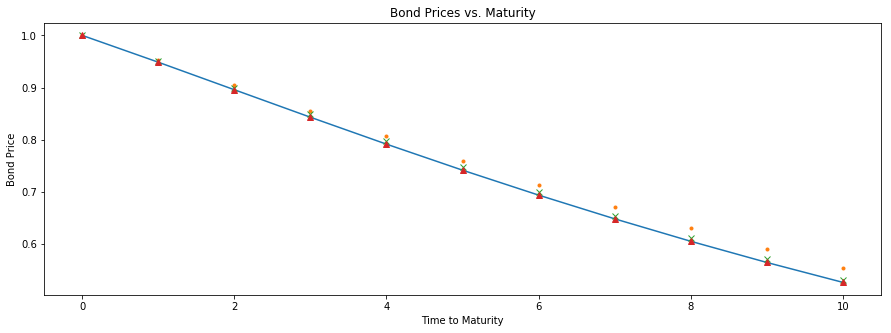

In [45]:
# Closed-form bond prices
bond_vec = bond_price(r0,0,t)

# plotting bond prices
plt.figure(figsize=(15,5))

## Analytical Solution
plt.plot(t,bond_vec)
## Simulated Yt and rt
plt.plot(t, ZCB_prices, ".")
# Simulated rt and estimated Yt
plt.plot(t, squad_prices, "x")
# Simulated rt and estimated Yt
plt.plot(t, trap_prices, "^")
plt.title("Bond Prices vs. Maturity")
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Price")
plt.show()

### Finding the Implied Yield

for the given bond prices ($y_t$)

$$ B(0,t) = e^{(-y_t)t} $$

i.e. it is the constant interest rate which gives the correct bond price, which we get by solving for $y_t$:

$$ y_t = - \frac{\ln(B(0,t))}{t} $$

In [37]:
# Determining yields
bond_yield = -np.log(bond_vec[1:])/t[1:]
mont_yield = -np.log(ZCB_prices[1:])/t[1:]
squad_yield = -np.log(squad_prices[1:])/t[1:]
trap_yield = -np.log(trap_prices[1:])/t[1:]

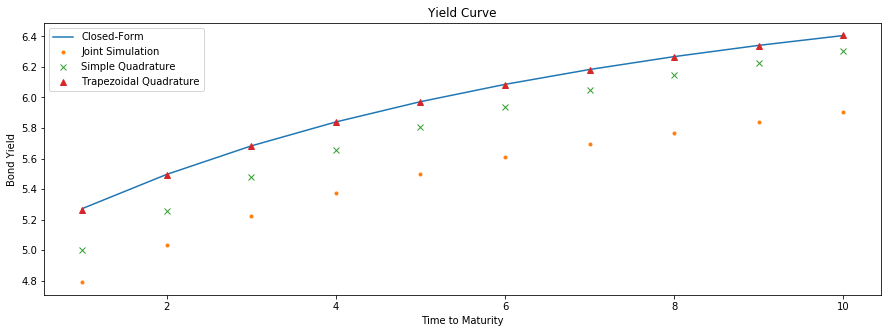

In [50]:
# Plotting the yields
plt.figure(figsize=(15,5))
plt.plot(t[1:], bond_yield*100, label="Closed-Form")
plt.plot(t[1:], mont_yield*100, ".", label="Joint Simulation")
plt.plot(t[1:], squad_yield*100, "x", label="Simple Quadrature")
plt.plot(t[1:], trap_yield*100, "^", label="Trapezoidal Quadrature")
plt.title("Yield Curve")
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Yield")
plt.legend()
plt.show()

# 3. The LIBOR Model

## The LIBOR Forward Market Model (LFMM)

Is seen as the benchmark interest rate model (as the BS is for equity option pricing).

**Market Models** attempt to model financial instruments that are actually traded in the market instead of focusing on an idealization of a financial variable (such as the short rate) which drives the market.

**The LFMM results in the analytical Black-Scholes Price for Market Caps**

The model can be calibrated easier using observable market instruments.

(There aremany ways to make the model complex, like introducing stochastic volatility)

### The Problem with Continuous Rates

They are not directly observable in the market. The LFMM instead is a market model, and it consistently models simple rates which are directly observable in markets.

#### Simple Rates

Is just an interest rate where there is **no compounding** on the interest earned

$$(1 + rT)$$

Therefore, the LFMM models the **simple forward rates in the market**

#### Forward Rates

A forward rate is an interest rate relevant to a future period that you can agree on today.

## LFMM Stochastic Differential Equation

Suppose we have a set of dates $\{ T_0, T_0, ..., T_N \}$

Let $P_j(t)$ be the price of a bond at time t with maturity $T_j$

Then the forward rate bewteen times $t_j$ and $t_{j+1}$ at time $t$ is:

$$ F(t,T_j, T_{j+1}1) = F_j(t) $$

The differential between the two dates can be expressed as:
$$\delta_j = T_{j+1} - T_j$$

The LFMM says that each market forward rate has the following SDE:

$$ dF_j(t) = F_j(t)\mu_j(t)dt + F_j(t) \sigma_j (t) dW_t $$

Where:

$\mu_j(t)$ is the time dependent drift associated with $F_j(t)$

$\sigma_j(t)$ is the time dependent volatility associated with $F_j(t)$

##### Assumptions

We can assume that each forward rate has its own Brownian Motion. This would imply that there is a source of **noise** or randomness for every forward rate in the market.

**Simplifying assumptions:** 

We are going to assume there be only one source of noise in the market, therefore **only one Brownian Motion**.

#### Time-Dependent Drift

$$ \mu_(t) = \sum_{k=\tau(t)}^{j} \frac{\delta_k F_k(t) \sigma_k(t) \sigma_j(t)}{1 + \delta_k F_k(t)} $$

Where,

$\tau(t) = \min \{ i:t < T_i \}$ which explains how the forward rates evolve over time

**N.B.** previous Forward Rates are not useful at present time

## Solution to the Libor SDE Paths and their Approximation

### Basic Approximation

We can refactor the solution to the Libor SDE to include interest rate paths in the following way:

$$ \hat{F}_j(t_i) = \hat{F}_j(t_{i-1}) e^{\big[\hat{\mu}_j(t_{i-1}) - \frac{1}{2}\sigma^2)\delta_{i-1} + \sigma_j \sqrt{\delta_{i-1}}Z_i \big]} $$

Where, 

$\hat{F}_j(t_i)$ is the approximation for the $j^{th}$ forward rate at time $t_i$


$Z \sim N(0,1)$

$$ \hat{\mu}_j (t_{i-1}) = \sum_{k=1}^{j} \frac{\delta_k \hat{F}_j(t_{i-1}) \sigma_k \sigma_j}{1 + \delta_k \hat{F}_j(t_{i-1})} $$

We need to then apply this using Monte Carlo Simulation using the values for $\hat{F}_j(t_0)$

We can initialize these variables in the following way:

$$ \hat{F}_j(t_0) = F_j(t_0) $$

Where $F_j(t_0)$ are implied from the market ZCB prices and the following formula:

$$ F_j(t_0) = \frac{P_j(0) - P_{j+1}(0)}{\delta_0 P_{j+1}(0)}$$

### Predictor-Corrector Method for Improving the Accuracy of Approximations

We can use this method that revolves around estimating an **initial** and a **terminal** drift, then using an average of these to **project future forward rates**.

Initialising the Estimator is done in the same way as above:

$$ \hat{F}_j(t_0) = F_j(t_0)$$

##### Estimate the Forward Rate for the Next Price Period:

$$ \tilde{F}_j(t_i) = \bar{F}_j(t_{i-1}) e^{\big[\mu^1_j(t_{i-1}) - \frac{1}{2}\sigma^2)\delta_{i-1} + \sigma_j \sqrt{\delta_{i-1}}Z_i \big]} $$

Where, 

$$ \mu^1_j (t) = \sum_{k=1}^{j} \frac{\delta_k \bar{F}_j(t_{i-1}) \sigma_k \sigma_j}{1 + \delta_k \bar{F}_j(t_{i-1})} $$

We then use these forward estimates to estimate the drift at time $t_i$:

$$ \mu^2_j (t_{i-1}) = \sum_{k=1}^{j} \frac{\delta_k \tilde{F}_j(t_{i-1}) \sigma_k \sigma_j}{1 + \delta_k \tilde{F}_j(t_{i-1})} $$

Final step is to compute the final estimate for the forward rate in the next period using:

$$ \bar{F}_j(t_i) = \bar{F}_j(t_{i-1}) e^{\big[\frac{1}{2}(\mu^1_j(t_{i-1}) + \mu^2_j(t_{i-1}) - \sigma^2)\delta_{i-1} + \sigma_j \sqrt{\delta_{i-1}}Z_i \big]} $$

**N.B.** $Z_i$ is used both for the preliminary and the final forward estimates

## Simulating Bond Prices

We can do this by:

- **simulating forward rates**


- using these to **imply capitalisation factors**


- then **inverting these** to imply **discount factors** which should be equal to the bond price under no arbitrage.

**N.B.** when taking averages to get our MC estimate, we only take averages when we have all simulations for the bond prices. This is a computationally expensive simulation, therefore we will be vectorizing as much as possible for maximum efficiency.

In [51]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [52]:
# parameters
r0 = 0.05
alpha = 0.2
b = 0.08
sigma = 0.025

# problem parameters
## we are dealing with bond maturities that are 2 years apart
t = np.linspace(0,40,21)
## volatility for the LFMM model
sigmaj = 0.1

#### Generate Bond Prices Using Vasicek Dynamics

In [54]:
# Analytical Bond price
def A(t1, t2):
    return (1-np.exp(-alpha*(t2-t1)))/alpha

def C(t1, t2):
    val_1 = (t2-t1-A(t1,t2))*(sigma**2/(2*alpha**2)-b)
    val_2 = sigma**2*A(t1,t2)**2/(4*alpha)
    return val_1 - val_2

def bond_price(r,t,T):
    return np.exp(-A(t,T)*r + C(t,T))

vasi_bond = bond_price(r0,0,t)

In [56]:
# Applying the algorithms
np.random.seed(0)
# is the number of MC simulations we are going to do at each point
n_simulations = 100000

# stores the number of time steps we are simulating over (number of time increments) 
n_steps = len(t)

# pre-allocate space fpr forward rates under both methods
## We need to pre-allocate entire matrices for the forward rates and not vectors
## We also initialize the forward rates which is why we are multipyling a matrix of ones by the
## forward rates at time t0 implied bu the bond prices
### Each row of the matrix consitutes one sample path

mc_forward = np.ones([n_simulations,n_steps-1])*(vasi_bond[:-1]-vasi_bond[1:])/(2*vasi_bond[1:])
predcorr_forward = np.ones([n_simulations,n_steps-1])*(vasi_bond[:-1]-vasi_bond[1:])/(2*vasi_bond[1:])
predcorr_capfac = np.ones([n_simulations,n_steps])
mc_capfac = np.ones([n_simulations,n_steps])

# store the time increments bewteen bond maturities
delta = np.ones([n_simulations,n_steps-1])*(t[1:]-t[:-1])

$$ \mu^2_j (t_{i-1}) = \sum_{k=1}^{j} \frac{\delta_k \tilde{F}_j(t_{i-1}) \sigma_k \sigma_j}{1 + \delta_k \tilde{F}_j(t_{i-1})} $$

$$ \bar{F}_j(t_i) = \bar{F}_j(t_{i-1}) e^{\big[\frac{1}{2}(\mu^1_j(t_{i-1}) + \mu^2_j(t_{i-1}) - \sigma^2)\delta_{i-1} + \sigma_j \sqrt{\delta_{i-1}}Z_i \big]} $$

`np.cumsum` returns the cumulative sum of the elements in a matrix with `axis=1` returning the cumprod of each row of the matrix.

For Example: if we have a vector, then the second element of the returned vector is the sum of the first and second element in the original vector

In [57]:
for i in range(1,n_steps):
    Z = norm.rvs(size = [n_simulations,1])
    
    # Explicit Monte Carlo simulation
    muhat = np.cumsum(delta[:,i:]*mc_forward[:,i:]*sigmaj**2/(1+delta[:,i:]*mc_forward[:,i:]),axis = 1)
    mc_forward[:,i:] = mc_forward[:,i:]*np.exp((muhat-sigmaj**2/2)*delta[:,i:]+sigmaj*np.sqrt(delta[:,i:])*Z)
    
    # Predictor-Corrector Montecarlo simulation
    mu_initial = np.cumsum(delta[:,i:]*predcorr_forward[:,i:]*sigmaj**2/(1+delta[:,i:]*predcorr_forward[:,i:]),axis = 1)
    for_temp = predcorr_forward[:,i:]*np.exp((mu_initial-sigmaj**2/2)*delta[:,i:]+sigmaj*np.sqrt(delta[:,i:])*Z)
    # refers to the above equation 1
    mu_term = np.cumsum(delta[:,i:]*for_temp*sigmaj**2/(1+delta[:,i:]*for_temp),axis = 1)
    # refers to the above equation 2
    predcorr_forward[:,i:] = predcorr_forward[:,i:]*np.exp((mu_initial+mu_term-sigmaj**2)*delta[:,i:]/2+sigmaj*np.sqrt(delta[:,i:])*Z)

##### Implying Capitalisation Factors

$$ C(t_0, t_n) = \Pi_{k=1}^{n} (1 + \delta_k F_k(t_k)) $$

Where, 

$C(t,T)$ is the capitalisation factor for the period $t_0$ and $t_n$

We then take the inverse of the capitalisation factors to get the bond prices (same as the discount factors) and take the mean.

In [58]:
# Implying capitalisation factors from the forward rates
mc_capfac[:,1:] = np.cumprod(1+delta*mc_forward, axis = 1)
predcorr_capfac[:,1:] = np.cumprod(1+delta*predcorr_forward, axis = 1)

# Inverting the capitalisation factors to imply bond prices (discount factors)
mc_price = mc_capfac**(-1)
predcorr_price = predcorr_capfac**(-1)

# Taking averages
mc_final = np.mean(mc_price,axis = 0)
predcorr_final = np.mean(predcorr_price,axis = 0)

Plotting the results

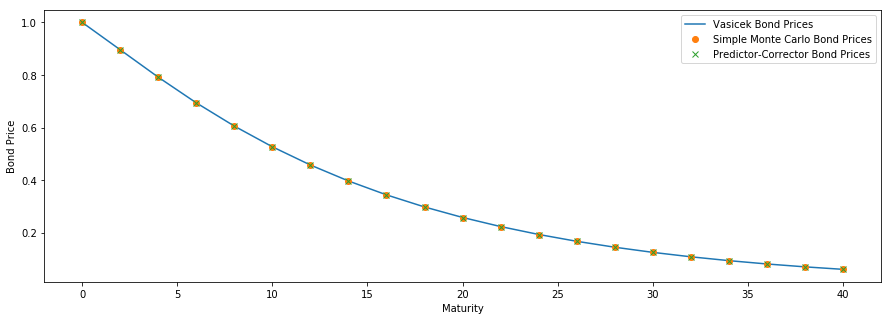

In [59]:
plt.figure(figsize=(15,5))
plt.xlabel("Maturity")
plt.ylabel("Bond Price")
plt.plot(t, vasi_bond, label="Vasicek Bond Prices")
plt.plot(t, mc_final, "o", label="Simple Monte Carlo Bond Prices")
plt.plot(t, predcorr_final, "x", label="Predictor-Corrector Bond Prices")
plt.legend()
plt.show()

## Numpy Appendix

In [70]:
arr = [1,2,3]
np.cumsum(arr)

array([1, 3, 6])

In [74]:
m = np.array([[2,3],[4,5]])
np.mean(m, axis=0)

array([3., 4.])